## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [16]:
#https://www.kaggle.com/shivan118/churn-modeling-dataset
#This is the dataset I chose from Kaggle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sb

pd.set_option('display.max_columns', None)

churnModelling = pd.read_csv("Churn_Modelling.csv")

In [17]:
#exploring the data
print(churnModelling.describe())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

In [18]:
print(churnModelling.isna().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [19]:
#exploring the data
print(churnModelling['EstimatedSalary'].describe())

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64


In [20]:
#dropping values that do not impact analysis 
churnModelling.drop(['RowNumber','CustomerId', 'Surname'],inplace= True, axis= 1)

In [ ]:
#exploring the data
print(churnModelling["CreditScore"].describe())

In [ ]:
#exploring the data
print(churnModelling['Age'].describe())

In [ ]:
#correlation matrix
df = pd.DataFrame(churnModelling)
corrMatrix = df.corr()
print (corrMatrix)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


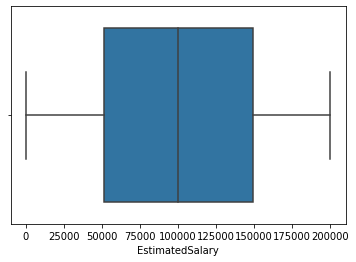

In [11]:
#comparing estimated salary to credit score in a plot
sb.boxplot(churnModelling["EstimatedSalary"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


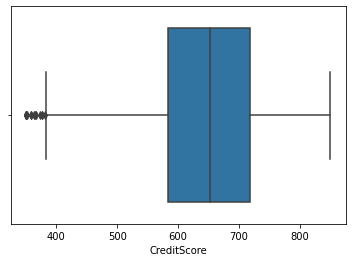

In [12]:
sb.boxplot(churnModelling["CreditScore"])
plt.show()

In [ ]:
#In the first plot, estimated salary has an average of 100,000 and is a normal boxplot. The second graph for credit score has a lot more outliers. The average creditscore is around 650. 

In [ ]:
# encode all categorical variables as numeric
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
geography_encoded = le1.fit_transform(churnModelling['Geography'])
le2 = LabelEncoder()
gender_encoded = le2.fit_transform(churnModelling['Gender'])
churnModelling['geographyEncoded'] = geography_encoded
churnModelling['genderEncoded'] = gender_encoded
print(churnModelling)

In [ ]:
#split the data in testing and training
from sklearn import metrics
from sklearn.model_selection import train_test_split

X = churnModelling.drop(['Exited', 'Geography', 'Gender'], axis=1, inplace=False)
y = churnModelling['Exited']
print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)

In [22]:
#Try different models on your training dataset - then select the most promising model
#   a. Random Forest
#   b. Decision Tree 
#   c. SVC

In [23]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

RFC_pred = RFC.predict(X_test)
RFC_accuracy = accuracy_score(y_test, RFC_pred)

print(' The random forest model predicted accuracy = ', RFC_accuracy)

imp_rf = RFC.feature_importances_
print(imp_rf)

 The random forest model predicted accuracy =  0.8503333333333334
[0.16413496 0.25006859 0.08298987 0.14867275 0.13330167 0.01642122
 0.03995925 0.16445169]


In [24]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DT_pred = RFC.predict(X_test)
DT_accuracy = accuracy_score(y_test, DT_pred)

print(' The decision tree model predicted accuracy = ', DT_accuracy)

 The decision tree model predicted accuracy =  0.8503333333333334


In [25]:
#support vector classifier model
from sklearn.svm import SVC
SVC = SVC()
SVC.fit(X_train, y_train)

SVC_pred = SVC.predict(X_test)
SVC_accuracy = accuracy_score(y_test, SVC_pred)

print(' The SVC model predicted accuracy = ', SVC_accuracy)


 The SVC model predicted accuracy =  0.799


In [ ]:
#Look at accuracy differeces and choose best  set, chose to dive further into random forest because it had the highest accuracy
# SVC was the lowest accuracy, decision tree and random forest were very similar with thier accuracies
print('The random forest model and decision tree model had the best accuracys with about 86%')

In [26]:
# Use cross validation to fine tune the model’s parameters. Also I believe this simplifies the model further. RandomForrests are hard to overfit in the first place.
#I choose you, random forest model
from sklearn.model_selection import GridSearchCV
RFC_cv = RandomForestClassifier()
to_search = {
    'n_estimators': [1, 10, 100, 1000],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 5, 7],
    'min_samples_split': [2, 8, 32, 64]
    }

clf = GridSearchCV(RFC_cv, to_search)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.856


In [ ]:
# Communicate your model’s performance and make sure you compare it to a benchmark when appropriate

# This is interesting to me as the new accuracy of 85.87% for the cross validated randomforest, is less than the benchmark I created for the original RandomForest model, with an accuracy of 86%.
# My model was more accurate the during the first RandomTree model I created at 86.2% than the rest of my tests. 


Text(0.5, 0, 'CreditScore')

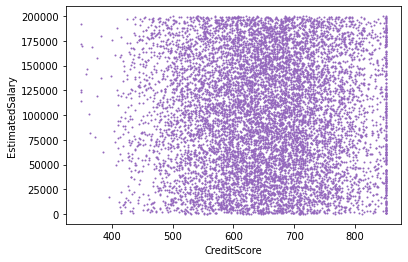

In [27]:
# Plot interesting graphs and results
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt
plt.scatter(x="CreditScore", y="EstimatedSalary", data=churnModelling, color='tab:purple', s = 1)
plt.tick_params(labelbottom=True)
plt.ylabel("EstimatedSalary")
plt.xlabel("CreditScore")

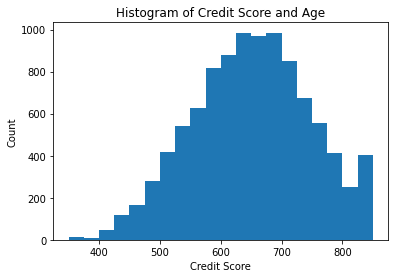

In [79]:
#estimated salary varies independently from creditscore
plt.hist(churnModelling["CreditScore"], bins=20)
plt.xlabel("Credit Score")
plt.ylabel("Count")
plt.title("Histogram of Credit Score")
plt.show()

#graph shows that count of credit scores are primarly between 600 and 720.